In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd 
import pmdarima as pm 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [3]:
data = pd.read_csv('../ts_data/Electric_Production.csv', parse_dates=['DATE'], index_col=['DATE'])
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


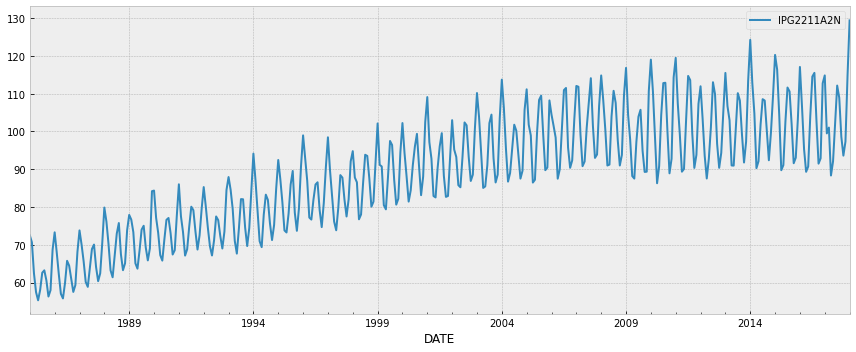

In [4]:
data.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

## ADF Test  

In [5]:
# Conduct an ADF test for stationarity.

alphas = [0.1, 0.05, 0.01]

print('='*50)
print("augmented Dickey–Fuller test (ADF)")
print('='*50)
print("H0: unit root is present")
print("Ha: stationarity or trend-stationarity")

for val in alphas:
    adf = pm.arima.ADFTest(alpha=val)
    alpha = adf.get_params()['alpha']
    p_val, _ = adf.should_diff(data)
    print('-'*50)
    print(f'***** Alpha: {alpha} *****')
    print(f"P-value: {p_val:.4f}")
    if p_val <= alpha:
        print("Reject the null hypothesis")
    else:
        print("Cannot reject the null hypothesis")

augmented Dickey–Fuller test (ADF)
H0: unit root is present
Ha: stationarity or trend-stationarity
--------------------------------------------------
***** Alpha: 0.1 *****
P-value: 0.0100
Reject the null hypothesis
--------------------------------------------------
***** Alpha: 0.05 *****
P-value: 0.0100
Reject the null hypothesis
--------------------------------------------------
***** Alpha: 0.01 *****
P-value: 0.0100
Reject the null hypothesis


# KPSS Test

In [6]:
# Conduct a KPSS test for stationarity.

alphas = [0.1, 0.05, 0.01]

print('='*50)
print("Kwiatkowski–Phillips–Schmidt–Shin (KPSS)")
print('='*50)
print("H0: stationary around a deterministic trend")
print("Ha: unit root")

for val in alphas:
    kpss = pm.arima.KPSSTest(alpha=val)
    alpha = kpss.get_params()['alpha']
    p_val, _ = kpss.should_diff(data)
    print('-'*50)
    print(f'***** Alpha: {alpha} *****')
    print(f"P-value: {p_val:.4f}")
    if p_val <= alpha:
        print("Reject the null hypothesis")
    else:
        print("Cannot reject the null hypothesis")

Kwiatkowski–Phillips–Schmidt–Shin (KPSS)
H0: stationary around a deterministic trend
Ha: unit root
--------------------------------------------------
***** Alpha: 0.1 *****
P-value: 0.0100
Reject the null hypothesis
--------------------------------------------------
***** Alpha: 0.05 *****
P-value: 0.0100
Reject the null hypothesis
--------------------------------------------------
***** Alpha: 0.01 *****
P-value: 0.0100
Reject the null hypothesis


## PP test

In [7]:
# Conduct a PP test for stationarity.

alphas = [0.1, 0.05, 0.01]

print('='*50)
print("Phillips–Perron test")
print('='*50)
print("H0: the variable contains a unit root")
print("Ha: the variable was generated by a stationary process")

for val in alphas:
    pp = pm.arima.PPTest(alpha=val)
    alpha = pp.get_params()['alpha']
    p_val, _ = pp.should_diff(data)
    print('-'*50)
    print(f'***** Alpha: {alpha} *****')
    print(f"P-value: {p_val:.4f}")
    if p_val <= alpha:
        print("Reject the null hypothesis")
    else:
        print("Cannot reject the null hypothesis")

Phillips–Perron test
H0: the variable contains a unit root
Ha: the variable was generated by a stationary process
--------------------------------------------------
***** Alpha: 0.1 *****
P-value: 0.0100
Reject the null hypothesis
--------------------------------------------------
***** Alpha: 0.05 *****
P-value: 0.0100
Reject the null hypothesis
--------------------------------------------------
***** Alpha: 0.01 *****
P-value: 0.0100
Reject the null hypothesis


## CH Test

In [8]:
# Conduct a CH test for seasonality.

ch = pm.arima.CHTest(m=12)
print("="*50)
print("The Canova-Hansen test for seasonal differences")
print("="*50)
print("H0: the seasonal pattern is stable.")
print(f"Critical values:")
for i, val in enumerate(ch.crit_vals):
    print(f"{i}| {val:.4f}")
is_reject = ch.estimate_seasonal_differencing_term(data)
if bool(is_reject):
    print("***** Reject the null hypothesis *****")
else:
    print("***** Cannot reject the null hypothesis *****")
print("-"*50)

The Canova-Hansen test for seasonal differences
H0: the seasonal pattern is stable.
Critical values:
0| 0.4617
1| 0.7480
2| 1.0008
3| 1.2375
4| 1.4625
5| 1.6920
6| 1.9043
7| 2.1170
8| 2.3269
9| 2.5407
10| 2.7391
***** Cannot reject the null hypothesis *****
--------------------------------------------------


## OCSB Test

In [9]:
ocsb = pm.arima.OCSBTest(m=12)

In [10]:
ocsb.get_params()

{'lag_method': 'aic', 'm': 12, 'max_lag': 3}

In [11]:
# Perform an OCSB test of seasonality.

ocsb = pm.arima.OCSBTest(m=12, max_lag=50)
print("="*50)
print("Osborn, Chui, Smith, and Birchenhall (OCSB) test")
print("="*50)
print("H0: a series contains a seasonal unit root")
for name, val in ocsb.get_params().items():
    print(name, val)

is_reject = ocsb.estimate_seasonal_differencing_term(data)
if bool(is_reject):
    print("***** Reject the null hypothesis *****")
else:
    print("***** Cannot reject the null hypothesis *****")
print("-"*50)

Osborn, Chui, Smith, and Birchenhall (OCSB) test
H0: a series contains a seasonal unit root
lag_method aic
m 12
max_lag 50
***** Reject the null hypothesis *****
--------------------------------------------------
